In [1]:
import numpy as np
from numpy import ndarray
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from helper_functions import plot_drawings
%matplotlib inline

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

2023-11-09 18:30:56.876575: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-09 18:30:56.877807: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-09 18:30:56.897134: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-09 18:30:56.897157: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-09 18:30:56.897170: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

**Problem Statement 1**

Write a neural network to recognize two handwritten digits, zero and one.


+ The data set contains 1000 training examples of handwritten digits, here limited to zero and one.  
+ Each training example is a 20-pixel x 20-pixel grayscale image of the digit. 
+ Each pixel is represented by a floating-point number indicating the grayscale intensity at that location. 
+ The 20 by 20 grid of pixels is flattened into a 400-dimensional vector. 

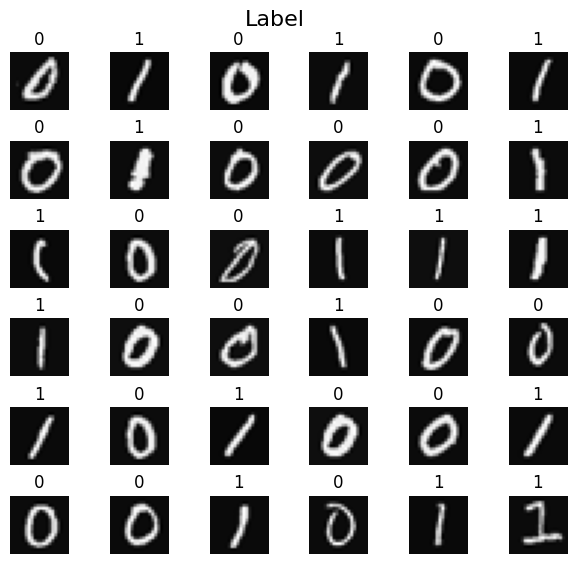

In [2]:
# Load provided data
X, y = np.load("data/neural_networkX.npy"), np.load("data/neural_networkY.npy")
X, y = X[0:1000], y[0:1000]
assert X.shape == (1000, 400)
assert y.shape == (1000, 1)
plot_drawings(X, y, 6)

- The parameters have dimensions that are sized for a neural network with $25$ units in layer 1, $15$ units in layer 2 and $1$ output unit in layer 3. 

    - Recall that the dimensions of these parameters are determined as follows:
        - If network has $s_{in}$ units in a layer and $s_{out}$ units in the next layer, then 
            - $W$ will be of dimension $s_{in} \times s_{out}$.
            - $b$ will a vector with $s_{out}$ elements
  
    - Therefore, the shapes of `W`, and `b`,  are 
        - layer1: The shape of `W1` is (400, 25) and the shape of `b1` is (25,)
        - layer2: The shape of `W2` is (25, 15) and the shape of `b2` is: (15,)
        - layer3: The shape of `W3` is (15, 1) and the shape of `b3` is: (1,)
>**Note:** The bias vector `b` could be represented as a 1-D (n,) or 2-D (1,n) array. Tensorflow utilizes a 1-D representation and this lab will maintain that convention. 
               

Build the TensorFlow model with 3 layers. 25, 15 and 1 nodes respectively:

In [3]:
model = Sequential([               
    tf.keras.Input(shape=(400,)), 
    Dense(units=25, activation="sigmoid"),
    Dense(units=15, activation="sigmoid"),
    Dense(units=1, activation="sigmoid")
], name = "digit_recognition")                            
model.summary()

Model: "digit_recognition"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                10025     
                                                                 
 dense_1 (Dense)             (None, 15)                390       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 10431 (40.75 KB)
Trainable params: 10431 (40.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2023-11-09 18:30:58.546414: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-09 18:30:58.546624: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2211] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Define a loss function and run gradient descent to fit the weights of the model to the training data:

In [4]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)
model.fit(X, y, epochs=20)

Epoch 1/20
32/32 [==============================] - 0s 744us/step - loss: 0.6631
Epoch 2/20
32/32 [==============================] - 0s 548us/step - loss: 0.5184
Epoch 3/20
32/32 [==============================] - 0s 551us/step - loss: 0.3782
Epoch 4/20
32/32 [==============================] - 0s 506us/step - loss: 0.2663
Epoch 5/20
32/32 [==============================] - 0s 460us/step - loss: 0.1939
Epoch 6/20
32/32 [==============================] - 0s 446us/step - loss: 0.1482
Epoch 7/20
32/32 [==============================] - 0s 474us/step - loss: 0.1178
Epoch 8/20
32/32 [==============================] - 0s 498us/step - loss: 0.0967
Epoch 9/20
32/32 [==============================] - 0s 567us/step - loss: 0.0813
Epoch 10/20
32/32 [==============================] - 0s 578us/step - loss: 0.0697
Epoch 11/20
32/32 [==============================] - 0s 475us/step - loss: 0.0606
Epoch 12/20
32/32 [==============================] - 0s 449us/step - loss: 0.0534
Epoch 13/20
32/32 [======

Check and plot predictions:

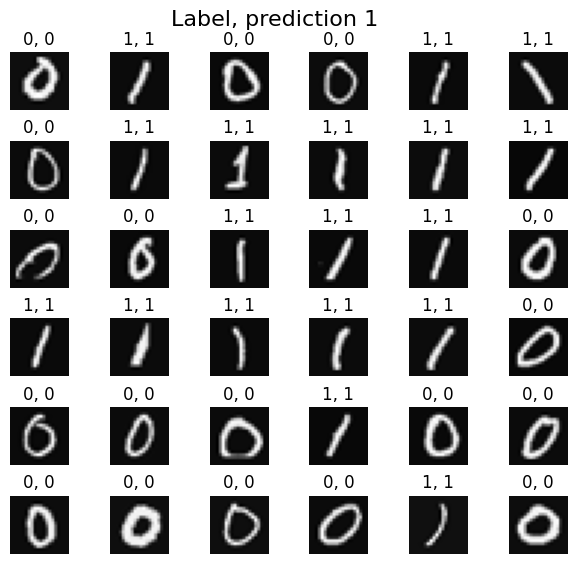

In [5]:
plot_drawings(X, y, 6, model)

**Problem Statement 2**

Build a dense layer subroutine for NumPy, then create a model using this subrouting:

In [6]:
def sigmoid(x):
    return 1. / (1. + np.exp(-x))

class My_sequential:
    def __init__(self, W1, b1, W2, b2, W3, b3):
        self.W1 = W1
        self.b1 = b1
        self.W2 = W2
        self.b2 = b2
        self.W3 = W3
        self.b3 = b3

    def predict(self, x):
        a1 = self.my_dense(x,  self.W1, self.b1, sigmoid)
        a2 = self.my_dense(a1, self.W2, self.b2, sigmoid)
        a3 = self.my_dense(a2, self.W3, self.b3, sigmoid)
        return(a3)

    def my_dense(self, a_in: ndarray, W: ndarray, b: ndarray, g) -> ndarray:
        """
        Computes dense layer.

        Args:
            a_in (ndarray): Input data.
            W (ndarray): Weight matrix, n features per unit, j units.
            b (ndarray): Bias vector, j units.
            g: Activation function.

        Returns:
            ndarray: Activations.
        """
        units = W.shape[1]
        a_out = np.zeros(units)
        for j in range(units):
            w = W[:, j]
            z = np.dot(w, a_in) + b[j]
            a_out[j] = g(z)
        return(a_out)

x_tst = 0.1*np.arange(1,3,1).reshape(2,)
W_tst = 0.1*np.arange(1,7,1).reshape(2,3)
b_tst = 0.1*np.arange(1,4,1).reshape(3,)
assert np.allclose(
    My_sequential.my_dense(_, x_tst, W_tst, b_tst, sigmoid),
    [0.54735762, 0.57932425, 0.61063923]
)

Copy trained weights and biases from Tensorflow and plot predictions using this model:

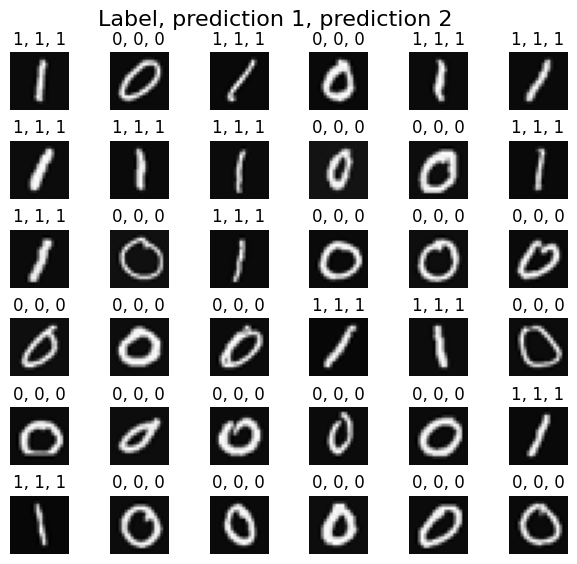

In [7]:
# Copy weights
[layer1, layer2, layer3] = model.layers
W1_tmp,b1_tmp = layer1.get_weights()
W2_tmp,b2_tmp = layer2.get_weights()
W3_tmp,b3_tmp = layer3.get_weights()

# Make predictions
model2 = My_sequential(W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp)
plot_drawings(X, y, 6, model, model2)